In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import 

plt.style.use('dark_background')


In [4]:
df = pd.read_csv('emp_data.csv')
df.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [5]:
df.tail()

,Salary_hike,Churn_out_rate
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


In [6]:
df.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


In [7]:
df.info()

# there are no null values in the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Salary_hike     10 non-null     int64
 1   Churn_out_rate  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [8]:
df.isna().sum()

# No null values 

Salary_hike       0
Churn_out_rate    0
dtype: int64

Text(0, 0.5, 'Salary Hike')

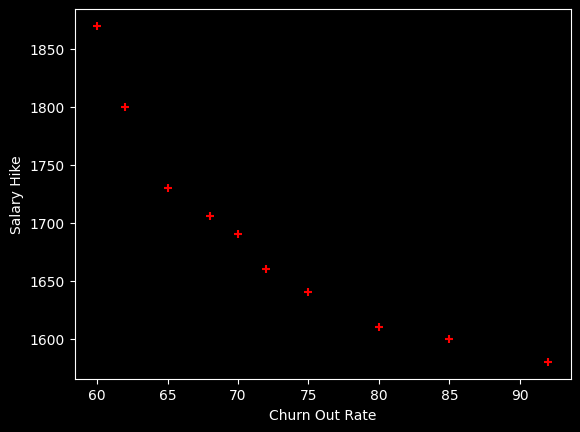

In [9]:
plt.scatter(df['Churn_out_rate'], df['Salary_hike'], marker = '+', color = 'red')
plt.xlabel('Churn Out Rate')
plt.ylabel('Salary Hike')

<Axes: >

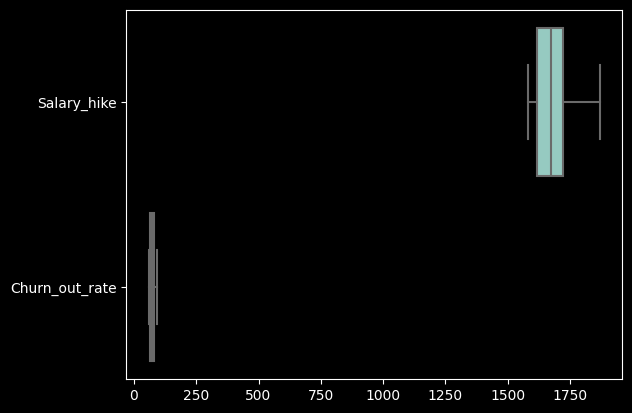

In [10]:
sns.boxplot(df, orient = 'h')

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

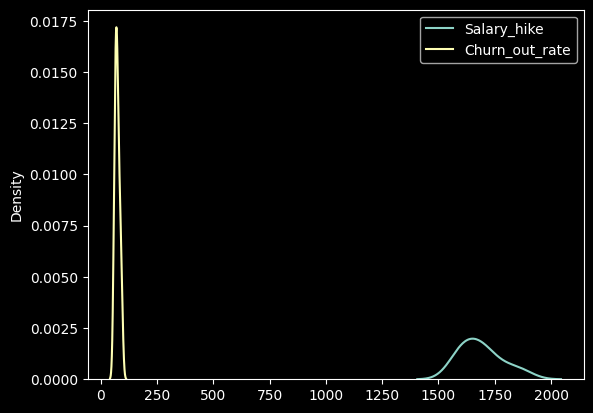

In [11]:
sns.kdeplot(df)

In [12]:
# Normalizing the given data 

def norm(x):
    z = (x-x.min())/(x.max()-x.min())
    return z

In [13]:
norm_df = norm(df)
norm_df.head()

,Salary_hike,Churn_out_rate
0,0.000000,1.00000
1,0.068966,0.78125
2,0.103448,0.62500
3,0.206897,0.46875
4,0.275862,0.37500


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

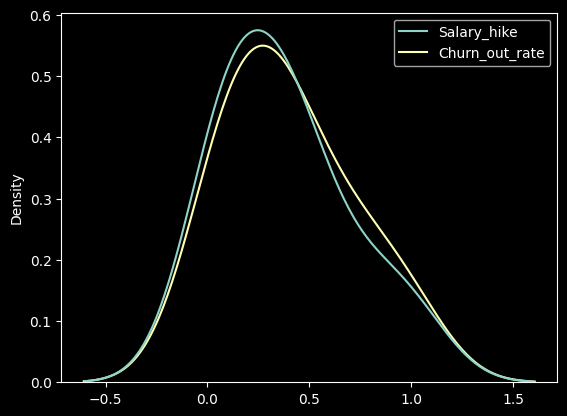

In [14]:
sns.kdeplot(norm_df)

# now our data has been perfectly scalled 

In [15]:
# dividing features into input and output features :

input = norm_df.drop("Churn_out_rate", axis = 'columns')
input.head()

,Salary_hike
0,0.000000
1,0.068966
2,0.103448
3,0.206897
4,0.275862


In [16]:
target = norm_df.drop('Salary_hike', axis = 'columns')
target.head()

,Churn_out_rate
0,1.00000
1,0.78125
2,0.62500
3,0.46875
4,0.37500


### Building the model:

In [17]:
model = LinearRegression()

In [18]:
model.fit(input, target)

LinearRegression()

In [19]:
model.score(input, target)

0.831236309988375

In [20]:
pred = model.predict(input)

In [24]:
x = mean_squared_error(target, pred)
x

0.015605697077344494

In [22]:
rmse = np.sqrt(x)
rmse

0.12492276444805604

<Axes: xlabel='Churn_out_rate', ylabel='Salary_hike'>

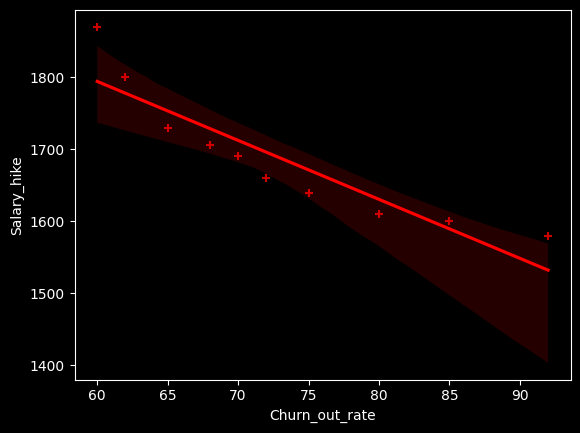

In [26]:
sns.regplot(x = "Churn_out_rate" , y = 'Salary_hike', data = df, marker = '+', color = 'red')